# Bayesian Blocks example with 3C 279

In [2]:
%matplotlib inline
from importlib import reload
from main import Main
import warnings
warnings.filterwarnings('error')

### Load timed data and weights for 3C 279
Create 1-day binned summary, and light curve from it with Poisson fits

In [3]:
cdata = Main('3C 279',  interval=1, mjd_range=None,        
                 weight_file='/nfs/farm/g/glast/g/catalog/pointlike/curr/uw9011/3C279_weights.pkl')
lcp = cdata.light_curve( rep='poisson', min_exp=0.1) 

Source 3C 279 at: (l,b)=(305.104,57.062); ROI radius=5
Loading data from 127 months 
	Selected 246775 photons within 5 deg of  (305.10,57.06)
	Dates: 2008-08-04 15:51 - 2018-08-01 19:25
	MJD  : 54682.7          - 58331.8         
Default binning: 3649 intervals of 1 days, in range (54683.0, 58332.0)
Adding weights from file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/3C279_weights.pkl
	2334 / 243421 photon pixels are outside weight region
	62381 weights set to NaN
Loaded 3565 / 3649 cells with exposure > 0.1 for light curve analysis
Fits using representation poisson: 3565 intervals


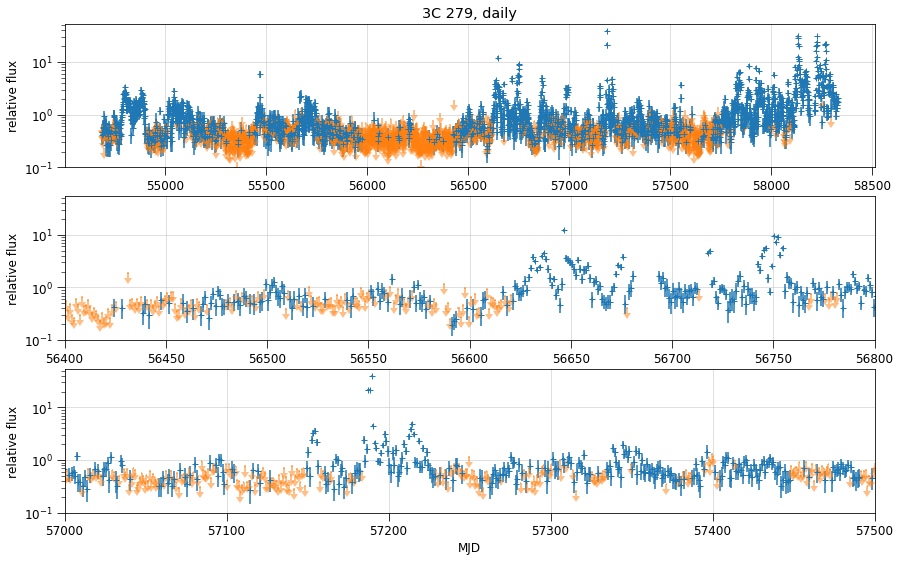

In [4]:
def plot_lc(lcp, title='', **kwargs):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,9))
    lcp.flux_plot(ax=ax1, yscale='log', ylim=(0.1,None), title=title, **kwargs);
    lcp.flux_plot(ax=ax2, yscale='log', ylim=(0.1,None), xlim=(56400, 56800), title=' ',**kwargs)
    lcp.flux_plot(ax=ax3, yscale='log', ylim=(0.1,None), xlim=(57000, 57500), title=' ',**kwargs);
plot_lc(lcp, title='3C 279, daily')

### Make Bayesian Block partitions, here using counts only|


In [7]:
%time bb = cdata.bayesian_blocks()

Loaded 3548 / 3649 cells with exposure > 0.3 for light curve analysis
Fits using representation poisson: 3548 intervals
Partitioned 3548 cells into 199 blocks, with prior 6.6
 Used FitnessFunc class <class 'light_curve.CountFitness'> 
Loaded 199 / 199 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 199 intervals
CPU times: user 27.9 s, sys: 37 ms, total: 28 s
Wall time: 28 s


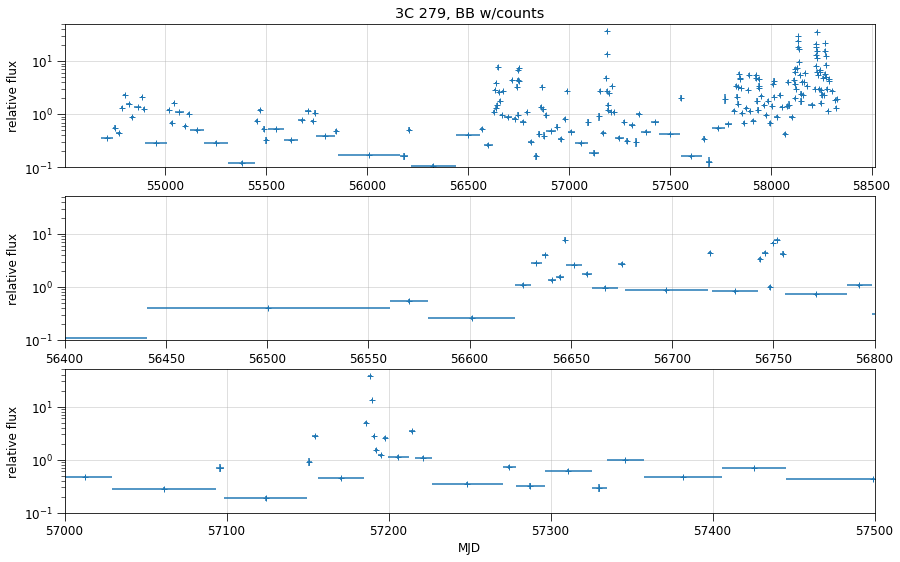

In [9]:
plot_lc(bb, title='3C 279, BB w/counts')

Partitioned 3548 cells into 217 blocks, with prior 6.6
 Used FitnessFunc class <class 'light_curve.LikelihoodFitness'> 
Loaded 217 / 217 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 217 intervals
CPU times: user 1min 48s, sys: 61 ms, total: 1min 48s
Wall time: 1min 48s


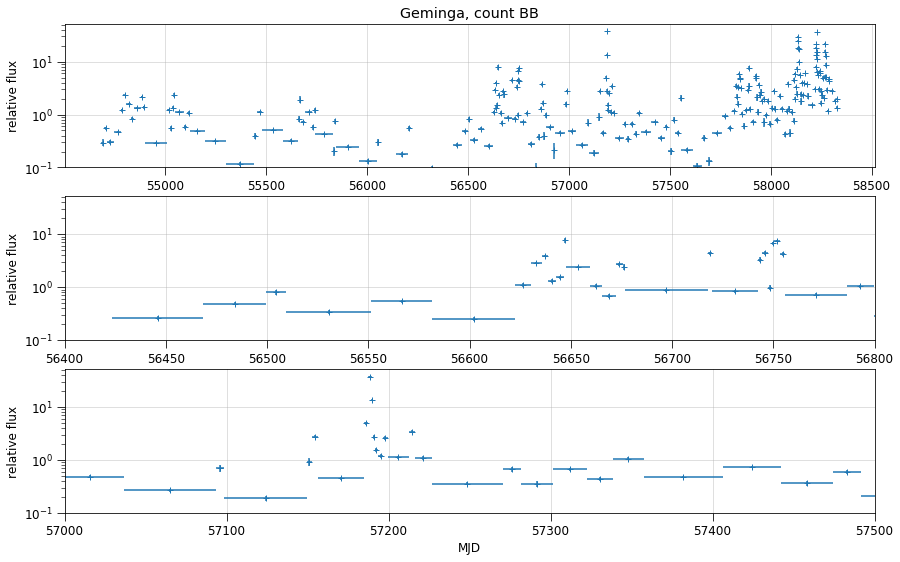

In [10]:
%time lcbbl = cdata.bayesian_blocks(fitness_func='likelihood')
plot_lc(lcbbl, title='Geminga, count BB')